In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

C:\Users\RAJAMVE1\AppData\Local\Temp\1\ipykernel_3700\2150674493.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [101]:
data = pd.read_csv('loan.csv')

C:\Users\RAJAMVE1\AppData\Local\Temp\1\ipykernel_3700\144827106.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


In [102]:
data.shape

(39717, 111)

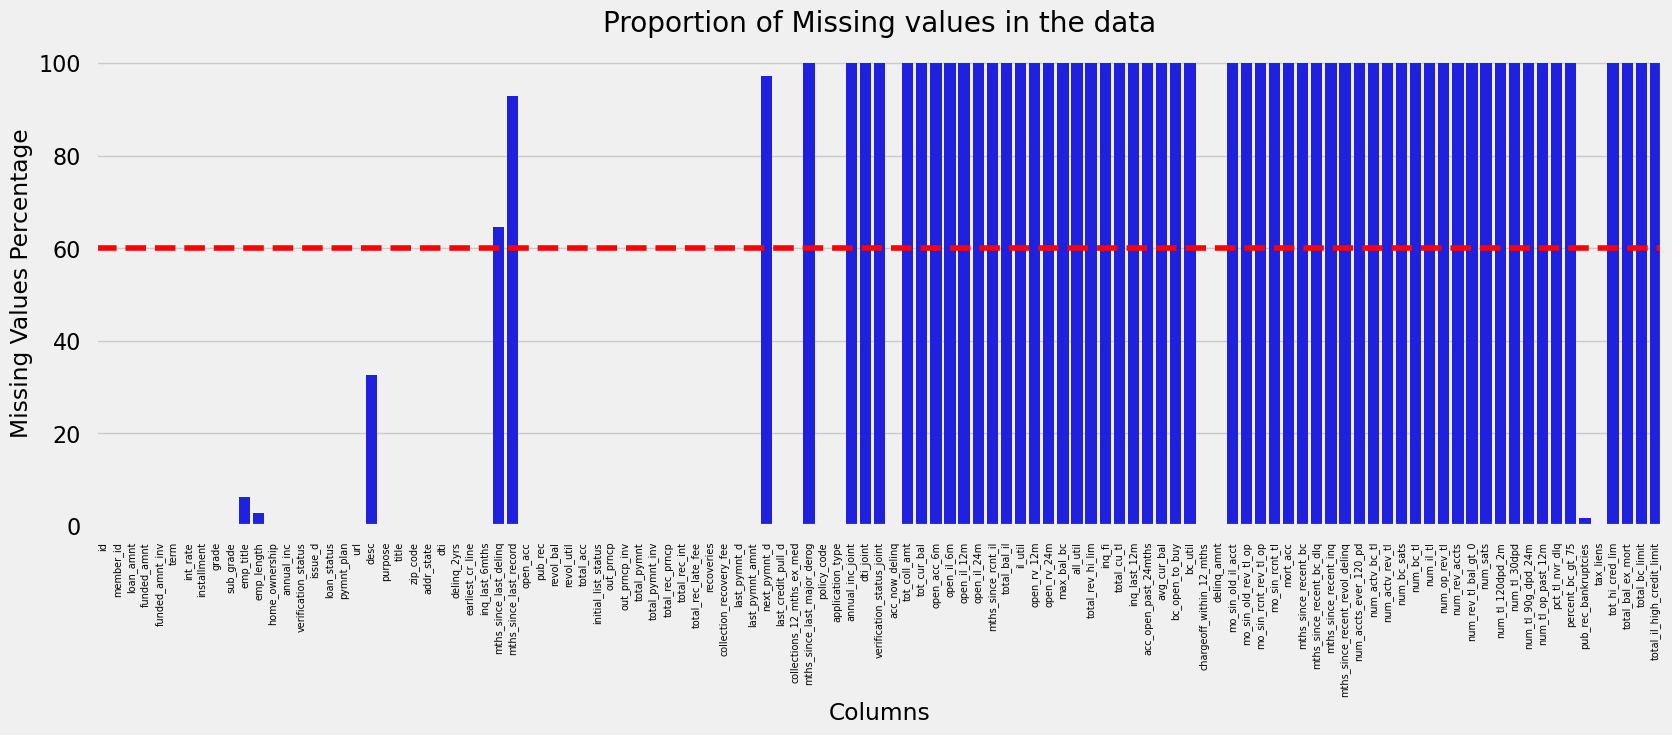

In [103]:
# Plotting the missing values across each column
missing_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
missing_data.columns = ['column_name', 'percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.barplot(x="column_name",y="percentage",data=missing_data,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(60, ls='--',color='red')
plt.title("Proportion of Missing values in the data")
plt.ylabel("Missing Values Percentage")
plt.xlabel("Columns")
plt.show()

In [104]:
# drooping the columns with more than or equal to 60% empty rows columns
drop_cols = missing_data[missing_data["percentage"]>=60]['column_name']
print(len(drop_cols))

57


Inference:
Total of 57 columns are there which have more than 60% null values.
Its better to drop these columns

In [106]:
#Subsetting the data to include just the columns without missing values
data = data[[x for x in data.columns if x not in list(drop_cols)]]

# Creating Features

In [311]:
# Binning Numerical Columns to create a categorical column

# Creating bins for annual income
data['flag']=data['annual_inc']/10000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-10K','10K-20K','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100K above']

data['income_range']=pd.cut(data['flag'],bins,labels=slot)

data['income_range'].fillna('100K above',inplace=True)

In [312]:
data['income_range'].value_counts(normalize=True)*100

40k-50k       14.772012
50k-60k       14.454767
100K above    14.318806
30k-40k       13.226074
60k-70k       10.627691
70k-80k        9.164841
20k-30k        8.648689
80k-90k        6.586600
90k-100k       5.206838
10K-20K        2.744417
0-10K          0.249264
Name: income_range, dtype: float64

In [313]:
# Binning Numerical Columns to create a categorical column

# Creating bins for loan amount
data['flag']=data['loan_amnt']/1000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1K','1K-2K','2k-3k','3k-4k','4k-5k','5k-6k','6k-7k','7k-8k','8k-9k','9k-10k','10K above']

data['loan_range']=pd.cut(data['flag'],bins,labels=slot)

data['loan_range'].fillna('10K above',inplace=True)

In [314]:
data['loan_range'].value_counts(normalize=True)*100

10K above    43.278697
9k-10k        9.305839
4k-5k         8.542941
7k-8k         7.273963
5k-6k         7.213536
3k-4k         5.806078
2k-3k         5.463655
6k-7k         5.123751
8k-9k         3.713775
1K-2K         3.489690
0-1K          0.788076
Name: loan_range, dtype: float64

Inference : Around 43% of customers have applied for aloan above 10K

In [316]:

# Creating bins for funded amount
data['flag']=data['funded_amnt']/1000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1K','1K-2K','2k-3k','3k-4k','4k-5k','5k-6k','6k-7k','7k-8k','8k-9k','9k-10k','10K above']

data['funded_amnt_range']=pd.cut(data['flag'],bins,labels=slot)

data['funded_amnt_range'].fillna('10K above',inplace=True)

In [317]:
data['funded_amnt_range'].value_counts(normalize=True)*100

10K above    42.563638
9k-10k        9.308357
4k-5k         8.638618
5k-6k         7.364605
7k-8k         7.304177
3k-4k         5.856434
2k-3k         5.488833
6k-7k         5.317622
8k-9k         3.842183
1K-2K         3.524939
0-1K          0.790593
Name: funded_amnt_range, dtype: float64

In [318]:
# Impute the missing data for employee experience
data['emp_length'].fillna('Not Available',inplace=True)

In [321]:
data['emp_length'].value_counts(normalize=True)*100

10+ years        22.355666
< 1 year         11.539139
2 years          11.048166
3 years          10.310446
4 years           8.651207
5 years           8.263464
1 year            8.157716
6 years           5.612206
7 years           4.464083
8 years           3.723846
9 years           3.167409
Not Available     2.706650
Name: emp_length, dtype: float64

In [322]:
# Create loan to income percentage feature
data['loan_to_income_percentage'] = ((data['loan_amnt']/data['annual_inc'])*100).astype(int)

In [323]:
# Creating bins for loan to income ratio

bins = [0,10,20,30,40,50,60,70,80,90,100]
slot = ['0-10%','10-20%','20-30%','30-40%','40-50%','50-60%','60-70%','70-80%','80-90%','90-100%']

data['loan_to_income_percentage_bins']=pd.cut(data['loan_to_income_percentage'],bins,labels=slot)

In [324]:
data['loan_to_income_percentage_bins'].value_counts(normalize=True)*100

10-20%     35.092761
0-10%      29.360758
20-30%     20.268703
30-40%      9.956644
40-50%      4.091047
50-60%      1.000706
60-70%      0.184009
70-80%      0.040331
80-90%      0.005041
90-100%     0.000000
Name: loan_to_income_percentage_bins, dtype: float64

In [325]:
# Cleaning the target variable i.e Loan status

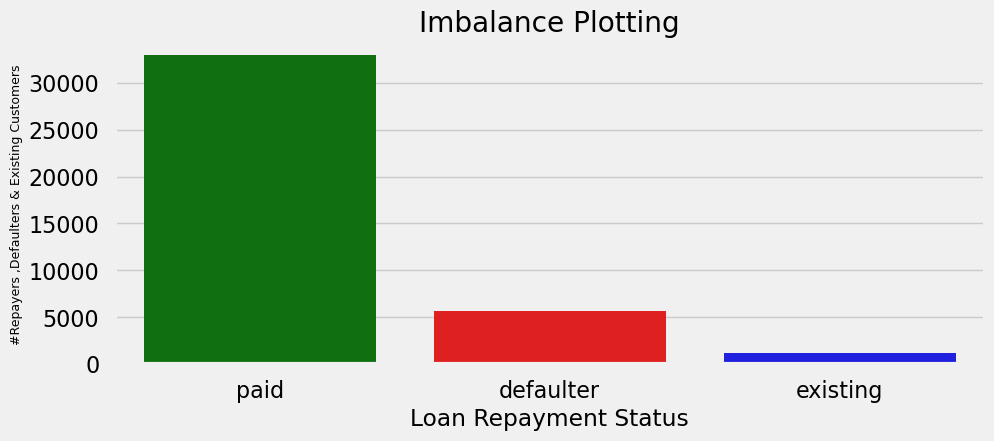

In [326]:
Imbalance = data["loan_status"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['paid','defaulter','existing']
sns.barplot(x=x,y="loan_status",data = Imbalance,palette= ['g','r','b'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("#Repayers ,Defaulters & Existing Customers ",fontdict={'fontsize' : 9, 'fontweight' : 5})
# plt.
plt.title("Imbalance Plotting")
plt.show()

In [327]:
data_without_curr_cust = data[data['loan_status']!='Current']

In [328]:
data_without_curr_cust['loan_status_new'] = np.where(data_without_curr_cust['loan_status']=='Fully Paid',0,1)

C:\Users\RAJAMVE1\AppData\Local\Temp\1\ipykernel_3700\1034233745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_curr_cust['loan_status_new'] = np.where(data_without_curr_cust['loan_status']=='Fully Paid',0,1)


In [329]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = data_without_curr_cust[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data_without_curr_cust[[feature, 'loan_status_new']].groupby([feature],as_index=False).mean()
    cat_perc["loan_status_new"] = cat_perc["loan_status_new"]*100
    cat_perc.sort_values(by='loan_status_new', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=data_without_curr_cust,
                    hue ="loan_status_new",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    plt.setp(ax1.get_legend().get_texts(), fontsize='8')
#     ax1.set_x
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 8, 'fontweight' : 2})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    ax1.tick_params(axis='both', which='major', labelsize=8)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='loan_status_new', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=8)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [330]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['paid','defaulter'])
    plt.show()

In [331]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=data_without_curr_cust, 
                hue="loan_status_new",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['paid','defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

# Categorical Variables Analysis

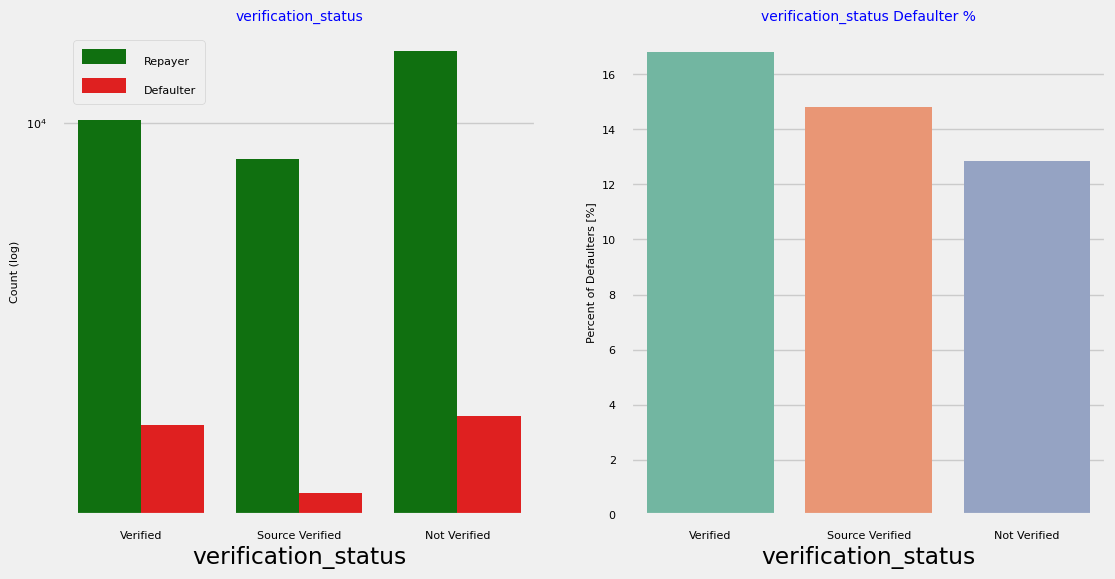

In [253]:
# Checking the contract type based on loan repayment status
univariate_categorical('verification_status',True)

# As we can see the Verification status of customer doesn't have much impact on whether the customer is defaulted or  not

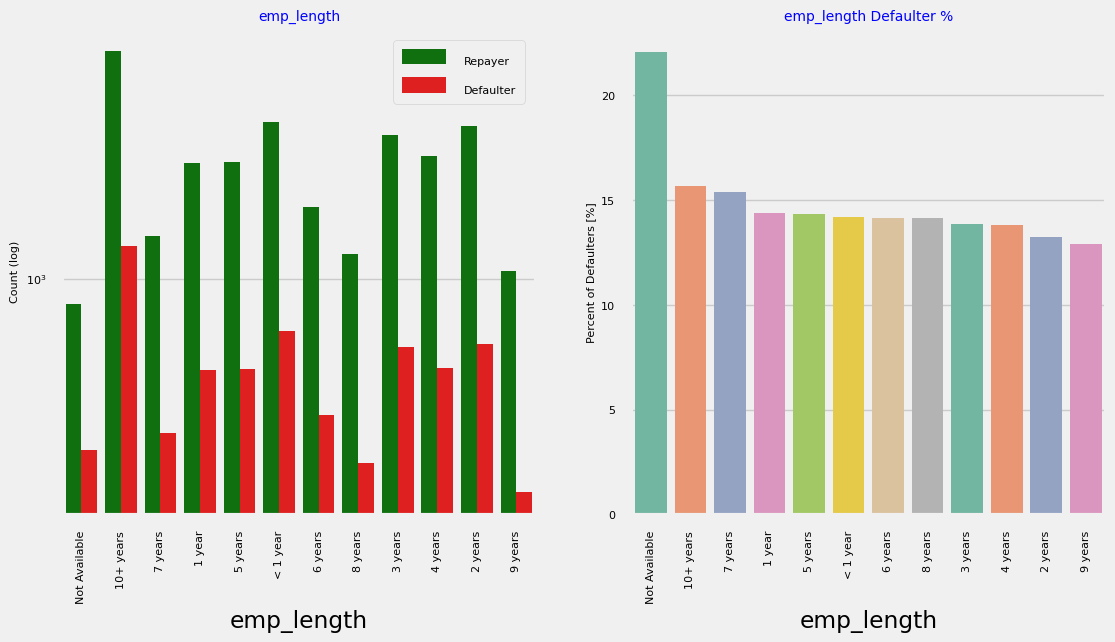

In [256]:
univariate_categorical('emp_length',True,label_rotation=True)

# The customers with missing information regarding the employment years have high default percentage(~25%)

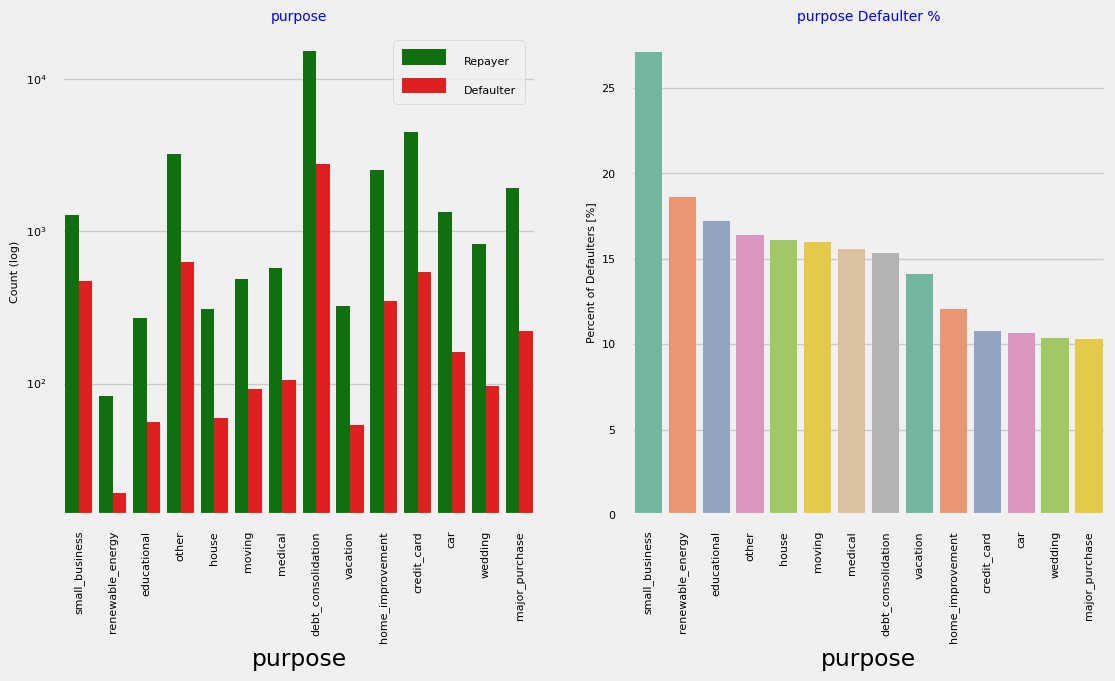

In [258]:
univariate_categorical('purpose',True,label_rotation=True)

# The customers who take loan for samll business have high default percentage(~27%)

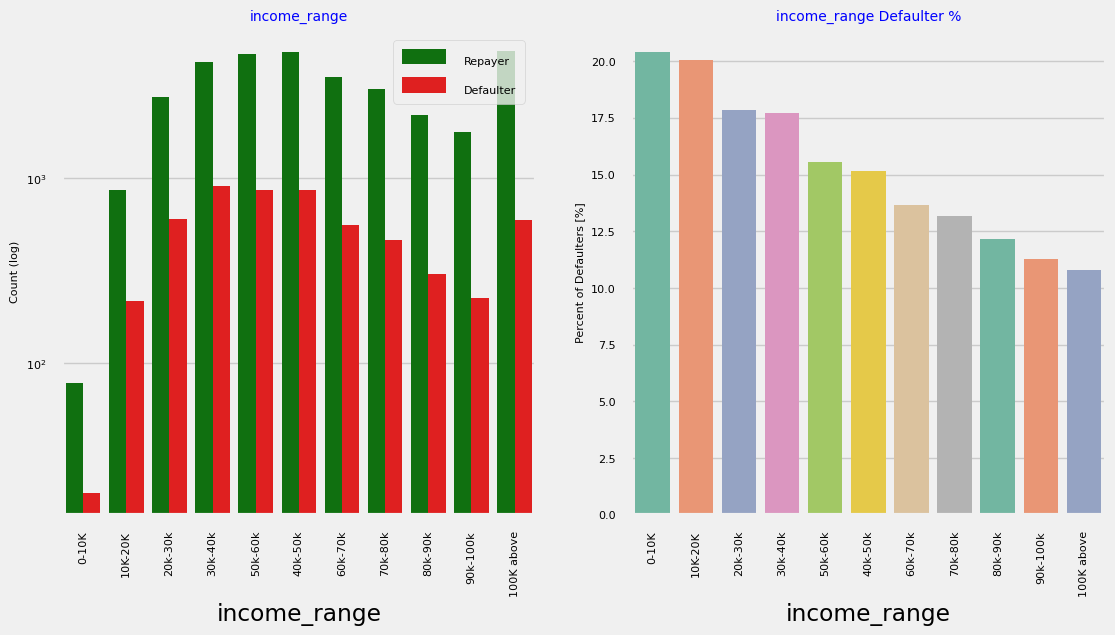

In [260]:
univariate_categorical('income_range',True,label_rotation=True)

# The customers with income below 20k higher default percentage(~21%)

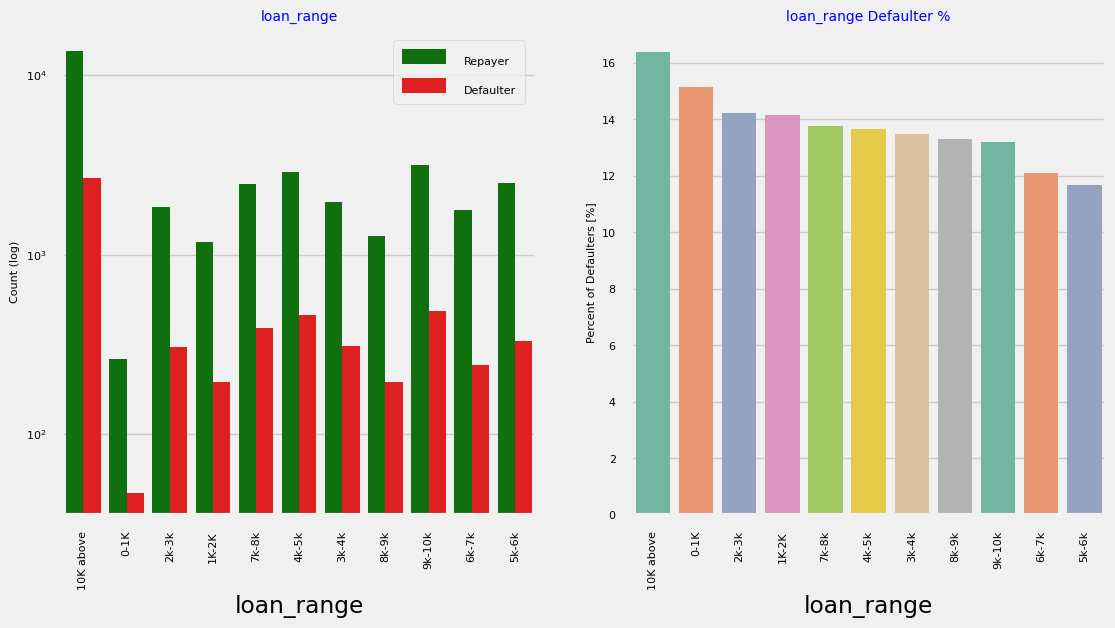

In [261]:
univariate_categorical('loan_range',True,label_rotation=True)

# The customers with loan amount higher than 10k ahve higher default percentage(~17%)

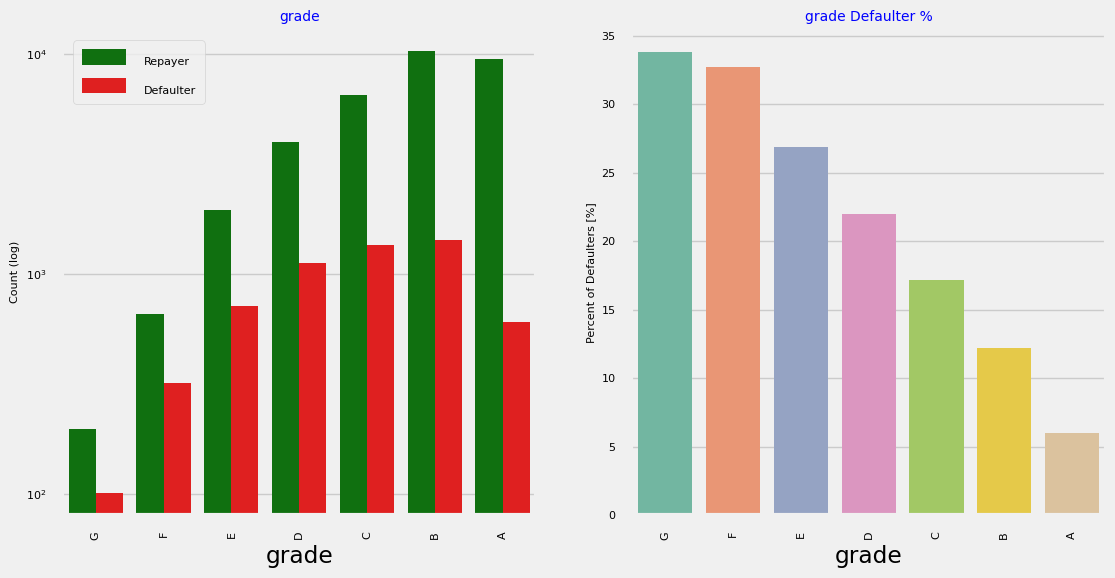

In [272]:
univariate_categorical('grade',True,label_rotation=True)

# The customers with grade above E i.e F and G have  higher default percentage(~33%)

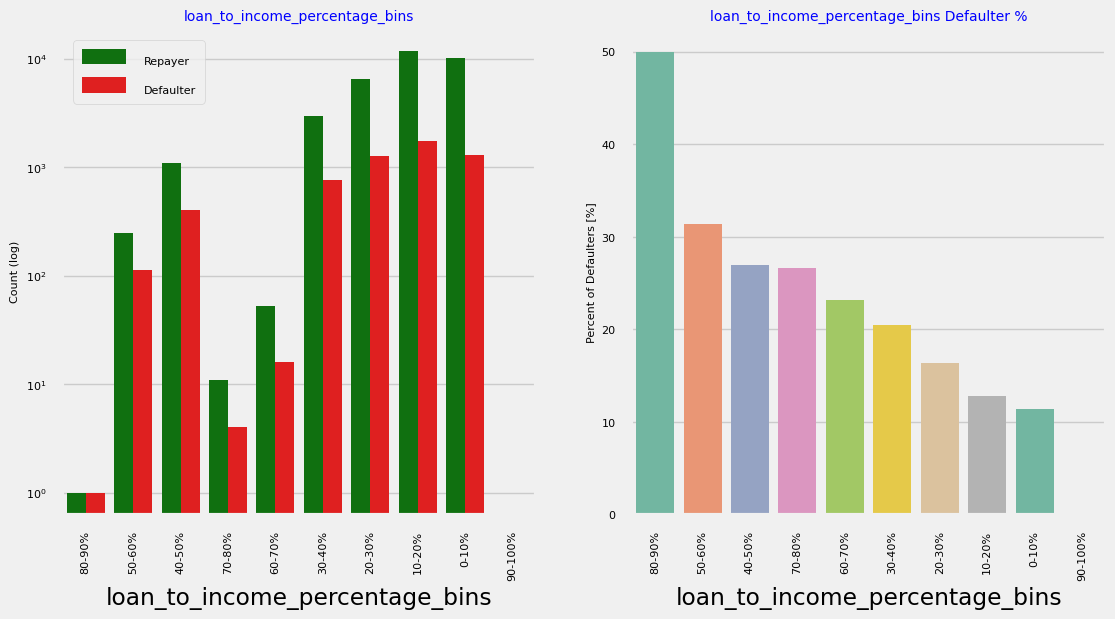

In [310]:
univariate_categorical('loan_to_income_percentage_bins',True,label_rotation=True)

# The customers with loan to income ratio of 80-90% have  higher default percentage(~50%)

# Numerical Features Analysis

In [301]:
cols_for_correlation = ['loan_amnt','annual_inc','pub_rec','open_acc','revol_bal','total_acc','pub_rec_bankruptcies']

In [302]:
paid_cust       = data_without_curr_cust[data_without_curr_cust['loan_status']=='Fully Paid'][cols_for_correlation]
defaulted_cust  = data_without_curr_cust[data_without_curr_cust['loan_status']=='Charged Off'][cols_for_correlation]


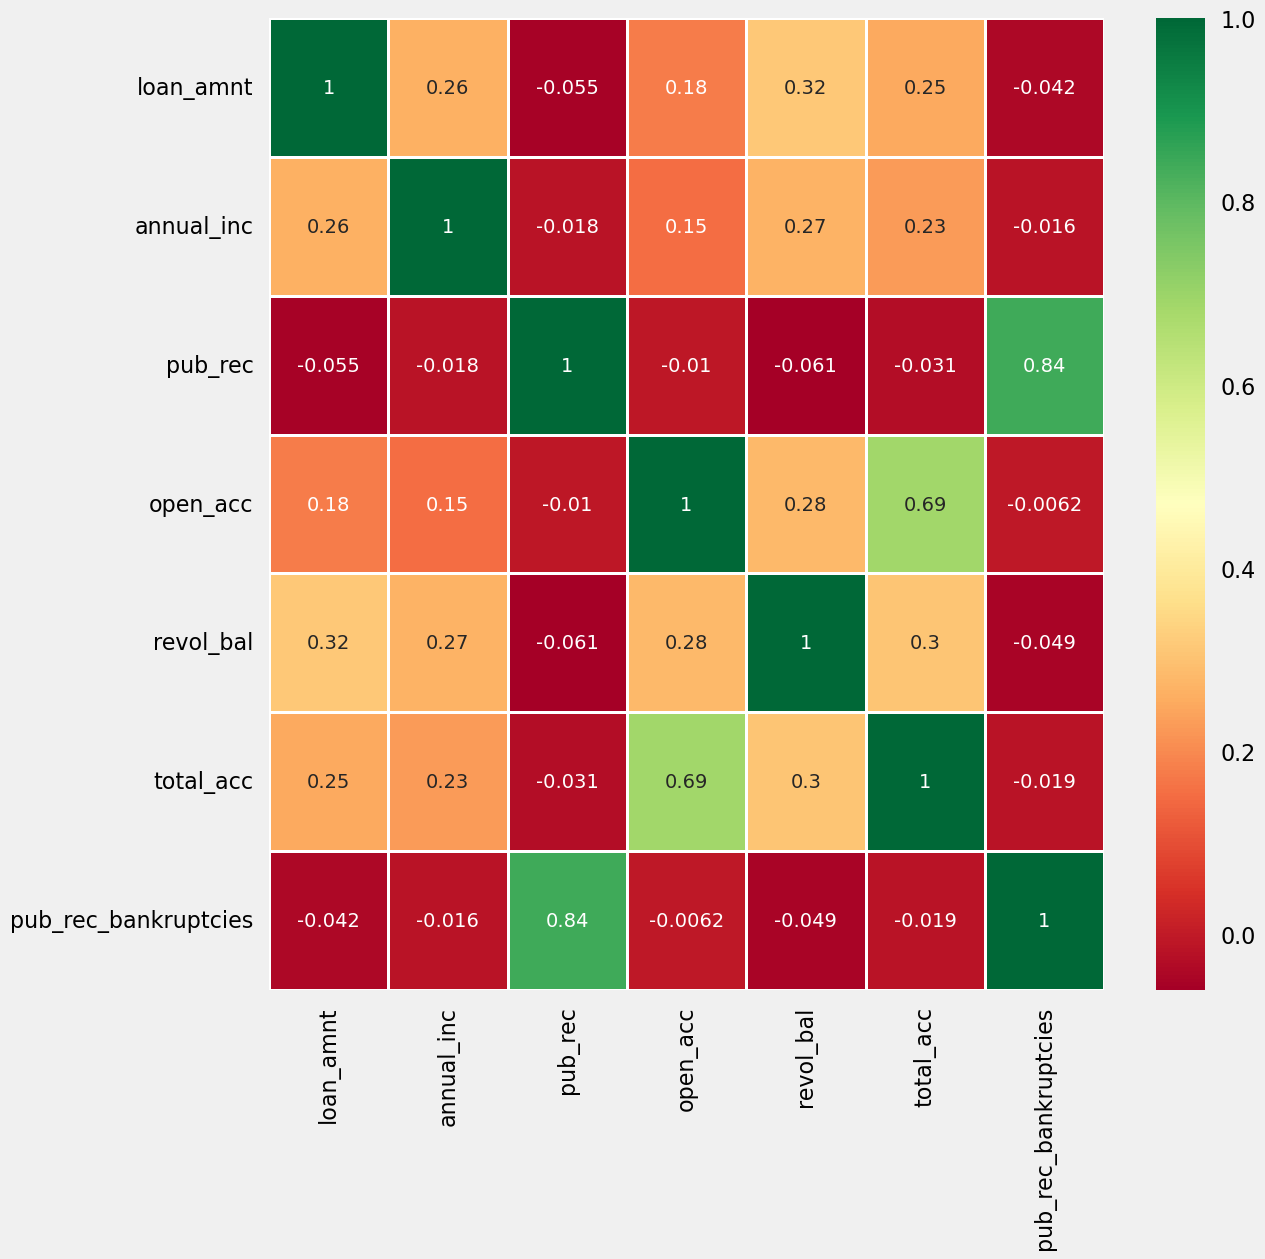

In [303]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(paid_cust.corr(), cmap="RdYlGn",annot=True,linewidth =1)

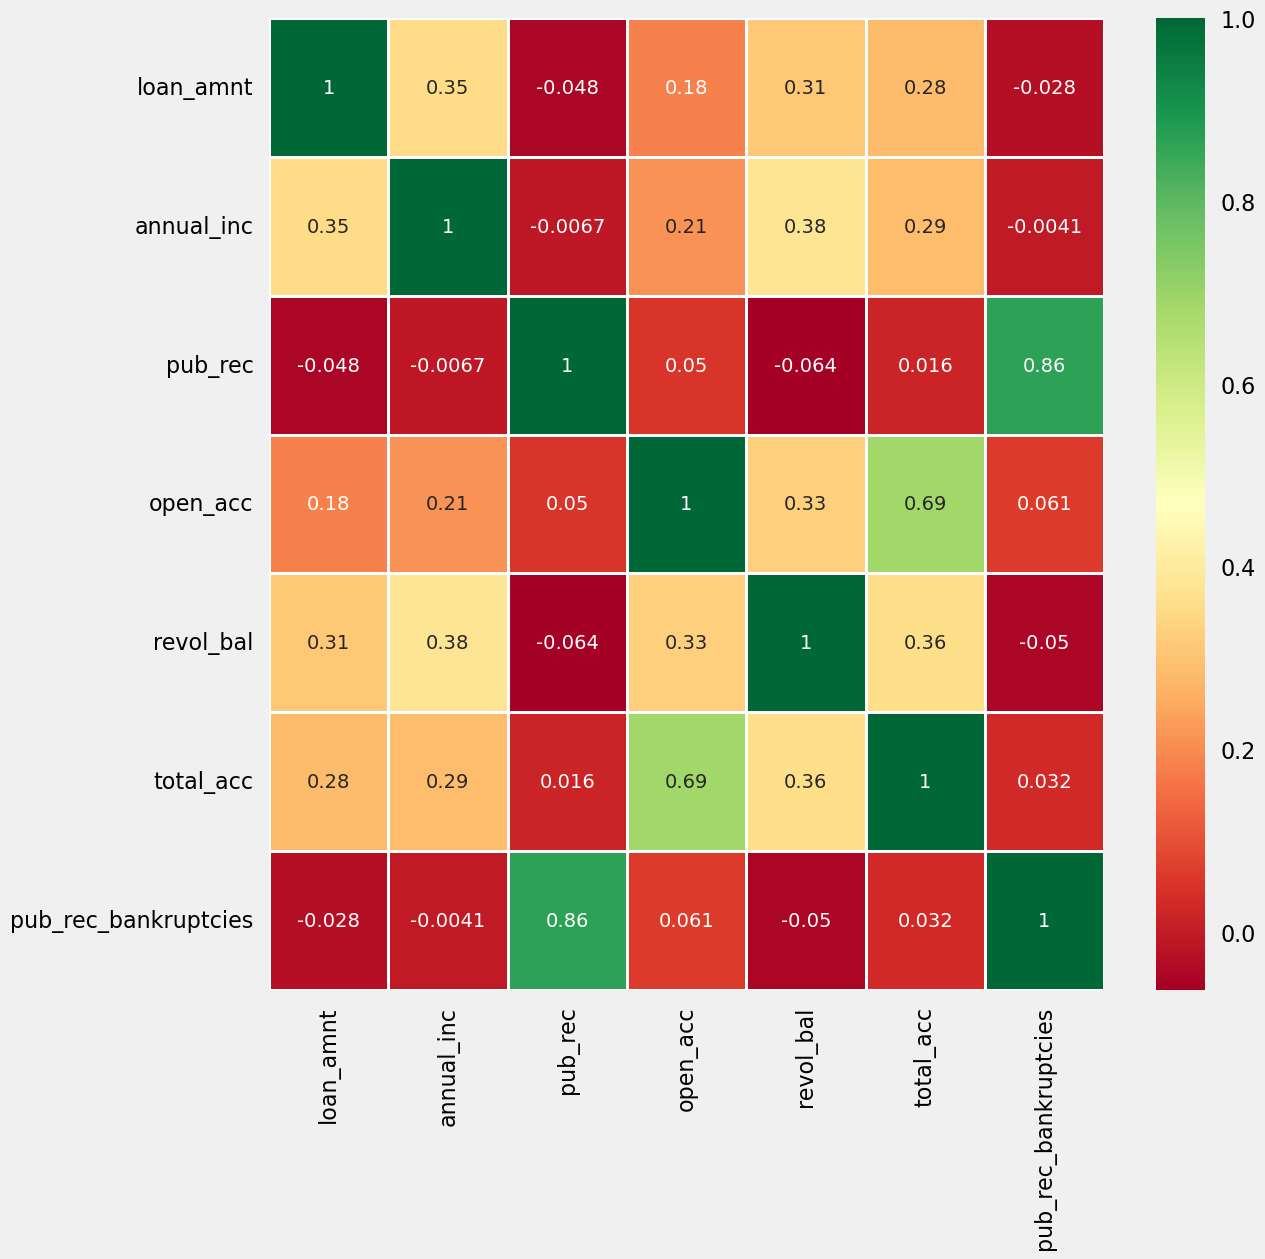

In [304]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(defaulted_cust.corr(), cmap="RdYlGn",annot=True,linewidth =1)

Fianl Conclusion:

1. We can work on the Data with fully paid and Defaulted customers base
2. We can create model on the above data to figure out the drivers of default customers
3. The model from above steps can be used to figure out the probability of an existing customer/ New customer to default
4. As this is an imbalance dataset we can use other performance metrics apart from accuracy like F1-score, Precision or recall to evaluate the model.